In [1431]:
from aocd import get_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [1432]:
f = open("test.txt", "r")
f = f.read()
data = f.split("\n") 

# Nr 8

# Nr 9 

In [715]:
d = np.array([[int(x) for x in row.split(" ")] for row in data])

ValueError: invalid literal for int() with base 10: '...#......'

In [226]:
def calc_diff(r):
    return (np.roll(r, -1) - r)[:-1]


In [227]:
def calc_next_number(d, reverse = False):
    remember = [d]
    current = d
    while np.any(current): 
        current = calc_diff(current)
        remember.append(current)
    if reverse: 
        remember = [np.flip(x) for x in remember]
    remember[-1] = np.append(remember[-1], 0)
    for x in range(len(remember)-1): 
        if reverse:
            value = remember[-2-x][-1] - remember[-1-x][-1]
        else:
            value = remember[-2-x][-1] + remember[-1-x][-1]
        remember[-2-x] = np.append(remember[-2-x],value)
    return remember[0][-1]

In [228]:
sum([calc_next_number(x, reverse=True) for x in d])

1012

# Nr 1 0

In [501]:
def step(d, come_from, pos):
    if (
        (d[pos[0] - 1, pos[1]] in ["|", "7", "F"])
        and (come_from != "t")
        and (d[pos[0], pos[1]] in ["|", "L", "J", "S"])
    ):
        return (pos[0] - 1, pos[1]), "b"
    elif (
        (d[pos[0] + 1, pos[1]] in ["|", "J", "L"])
        and (come_from != "b")
        and (d[pos[0], pos[1]] in ["|", "7", "F", "S"])
    ):
        return (pos[0] + 1, pos[1]), "t"
    elif (
        (d[pos[0], pos[1] + 1] in ["-", "J", "7"])
        and (come_from != "r")
        and (d[pos[0], pos[1]] in ["-", "L", "F", "S"])
    ):
        return (pos[0], pos[1] + 1), "l"
    elif (
        (d[pos[0], pos[1] - 1] in ["-", "F", "L"])
        and (come_from != "l")
        and (d[pos[0], pos[1]] in ["-", "7", "J", "S"])
    ):
        return (pos[0], pos[1] - 1), "r"
    else:
        return "End", None

In [502]:
d =  np.array([list(x) for x in data])
d = np.pad(d, pad_width=1, constant_values="X") 

In [503]:
distance = np.zeros(d.shape)
distance[:,:] = -1
distance[d == "S"] = 0

pos = np.where(distance == 0)
pos = (pos[0][0], pos[1][0])

current, origin  = step(d,"nothing", pos)
distance[current[0], current[1]] = 1

for x in range(20000):
    new, origin = step(d,origin, current)
    if new == "End":
        break
    else:
        distance[new[0], new[1]] = distance[current[0],current[1]] + 1
        current = new

In [504]:
import math 
math.ceil(distance.max() / 2)

70

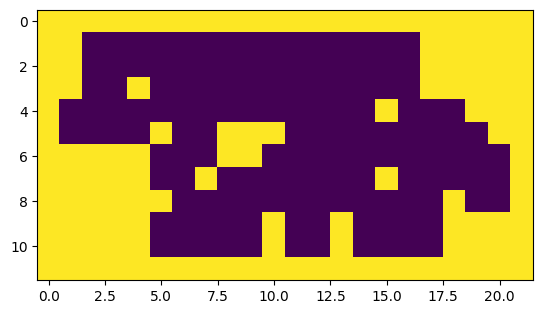

In [506]:
plt.imshow(distance == -1)
# beautiful

In [491]:
distance[0] = -1000
distance[-1] = -1000
distance[:,0] = -1000
distance[:,-1] = -1000

In [492]:
def warp_one_step(distance):
    for x in range(len(distance)):
        for y in range(len(distance[0])):
            if distance[x, y] == -1:
                if (
                    (distance[x, y - 1] == -1000.0)
                    or (distance[x, y + 1] == -1000.0)
                    or (distance[x-1, y] == -1000.0)
                    or (distance[x+1 , y] == -1000.0)
                ):
                    distance[x, y] = -1000
    return distance

In [493]:
for x in range(100):
    distance = warp_one_step(distance)

In [494]:
sum(distance[distance == -1])

-10.0

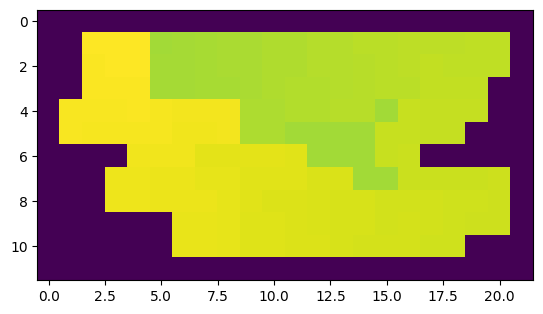

In [496]:
plt.imshow(distance)

# Nr 11

In [761]:
def expand(d, apply=True):
    add = []
    for n, x in enumerate(d): 
        if np.all(np.array(x) == "."):
            add.append(n)
    if apply:
        for n,y in enumerate(add): 
            d = list(d[:y+n])+ [list(d[y+n])] + list(d[y+n:])
        return d
    else:
        return add

In [762]:
#a
d = [list(x) for x in data]
d = expand(d)
d = expand(list([list(x) for x in np.array(d).T]))
d = np.array(d).T

stars = np.stack(np.where(d == "#")).T

distances = []
for x in stars: 
    for y in stars: 
        distances.append(sum(np.abs(x - y)))

sum(distances) / 2

9312968.0

In [763]:
#b 
d = [list(x) for x in data]
rows = expand(d, apply=False)
columns = expand(list([list(x) for x in np.array(d).T]), apply=False)
d = np.array(d)

stars = np.stack(np.where(d == "#")).T


distances = []
add_dist = 999999 # WHY?
add_count = 0
c = 0
for x in stars: 
    for y in stars: 
        base_distance = sum(np.abs(x - y))
        for z in rows: 
            if x[0] <  z < y[0] and x[0] < y[0]:
                base_distance+= add_dist
            elif y[0] <  z < x[0] and y[0] < x[0]:
                base_distance+= add_dist


        for w in columns: 
            if x[1] <  w < y[1] and x[1] < y[1]:
                 base_distance+= add_dist
            if y[1] <  w < x[1] and y[1] < x[1]:
                 base_distance+= add_dist
        distances.append(base_distance)

In [764]:
(sum(distances) / 2)

597714117556.0

# Nr 12

In [941]:
card = [x[:np.where(np.array(x) == " ")[0][0]] for x in [list(x) for x in data]]
info = [[int(x) for x in y.split(" ")[1].split(",")] for y in data]

In [942]:
import itertools

In [943]:
def check_if_met(c, i):

    remember = []
    current = 0

    for x in c: 
        if (x != ".") and (x != "#"):
            print ("bricked")
            return None
        if x == ".":
            if current == 0:
                pass
            else:
                remember.append(current)
                current = 0
        if x == "#":
            current +=1
    if current != 0: 
        remember.append(current)
    return remember == i

In [944]:
def check_all_combos(c, i):
    count = 0
    ind = np.where(np.array(c) == "?")[0]
    possible = list(itertools.product(*([["#", "."]] * len(ind))))
    for p in possible:
        current = c.copy()
        for n,x in enumerate(ind): 
            current[x] = p[n]
        if check_if_met(current, i):
            count +=1
    return count



In [953]:
def extend(c, i):
    return c * 5, i * 5

In [946]:
sum([(check_all_combos(card[x], info[x])) for x in range(len(card))])


21

In [947]:
info[0]

[1, 1, 3]

In [952]:
print(extend(card[1], info[1])[0])

['.', '?', '?', '.', '.', '?', '?', '.', '.', '.', '?', '#', '#', '.', '.', '?', '?', '.', '.', '?', '?', '.', '.', '.', '?', '#', '#', '.', '.', '?', '?', '.', '.', '?', '?', '.', '.', '.', '?', '#', '#', '.', '.', '?', '?', '.', '.', '?', '?', '.', '.', '.', '?', '#', '#', '.', '.', '?', '?', '.', '.', '?', '?', '.', '.', '.', '?', '#', '#', '.']


# Nr 13

In [1107]:
d = [list(x.replace("#", "1").replace(".", "0")) for x in data]
start = 0
fields = []
for x in range(len(d)):
    if len(d[x]) == 0: 
        fields.append(np.array(d[start:x]).astype(int))
        start = x+1
fields.append(np.array(d[start:x]).astype(int))

In [1108]:
def check_split(f, split, second_part=False):
    a = f[:,:split]
    b = f[:,split:]

    diff = a.shape[1] - b.shape[1]

    if diff > 0: 
        npad = ((0, 0), (0, diff))
        b = np.pad(b, pad_width=npad, mode='constant', constant_values=-1)
        dist = (np.flip(b,axis=1) == a).sum()
        if second_part: 
            return np.abs(dist - (b != -1).sum()) ==1
        else:
            return dist == (b != -1).sum()
    else:
        npad = ((0, 0), (np.abs(diff), 0))
        a= np.pad(a, pad_width=npad, mode='constant', constant_values=-1)
        dist = (np.flip(b,axis=1) == a).sum()
        if second_part:
            return np.abs(dist - (a != -1).sum()) ==1

        else:
            return dist == (a != -1).sum()


In [1109]:
count = 0 
sp = True
for f in fields:
    for x in range(1, f.shape[0]):
        if check_split(f.T,x, second_part=sp):
            count += (x * 100)
    for x in range(1, f.shape[1]):
        if check_split(f,x, second_part=sp):
            count += x
count

35799

# Nr 14

In [1433]:
d = np.array([list(x) for x in data])

In [1388]:
def flip_direction(d, direction):

    if direction == "s":
        d = np.flip(d,axis=0)
    elif direction == "w":
        d = d.T
    elif direction == "e":
        d = np.flip(d.T)
    elif direction == "n":
        pass
    else:
        print("broken direction.")
        return 0
    return d


def move_one_step(d_in, direction = "n"):
    d = d_in.copy()

    d = flip_direction(d, direction)

    for x in range(len(d)-1):
        move = ~((d[x] == "#") | (d[x] == "O"))   & (d[x+1] == "O")
        d[x][move] = "O"
        d[x+1][move] = "."

    d = flip_direction(d, direction)

    return d

In [1389]:
def count(d):
    return np.dot((d == "O").sum(axis=1), np.arange(len(d), 0, -1))

In [1390]:
# move one circle: 
def one_circle(d):
    current = d

    for x in range(500):
        new = move_one_step(current, direction="n")
        if np.all(new == current):
            current = new
            break
        current = new
    for x in range(500):
        new = move_one_step(current, direction="w")
        if np.all(new == current):
            current = new
            break
        current = new
    for x in range(500):
        new = move_one_step(current, direction="s")
        if np.all(new == current):
            current = new
            break
        current = new
    for x in range(500):
        new = move_one_step(current, direction="e")
        if np.all(new == current):
            current = new
            break
        current = new
    return current


In [1434]:
current = d

for x in range(500):
    new = move_one_step(current)
    if np.all(new == current):
        current = new
        break
    current = new
count(current)

106517

In [1435]:
stack = []
current = d.copy()
for x in range(500): 
    current = one_circle(current)
    stack.append(count(current))

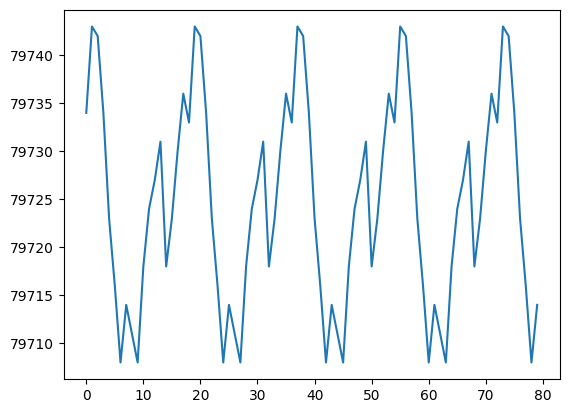

In [1436]:
plt.plot(stack[120:200])

In [1439]:
stack[198], stack[216], stack[234]

(79708, 79708, 79708)

In [1441]:
stack[198 + ((1000000000 - 1) % 18)]

79723